In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import mylibrary.splinelib_nd as tsn

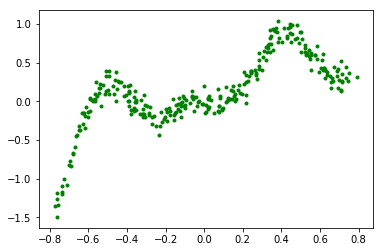

In [2]:
x = np.linspace(0,1,300)
noise = np.random.normal(0,0.02, x.shape)
x = x + noise
y= (2 * np.sin(10*x) + np.cos(20 * x - 3) + 3 * np.log(10*x + 0.5) - 4)/6.
noise = np.random.normal(0,0.1, x.shape)
y = y + noise
x = (x - 0.5)*1.5 #x.mean() # good practice to zero-center x in linear mapping
xx = x.reshape(-1,1)
yy = y.reshape(-1,1)
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')

In [3]:
piece = tsn.SplineND(1)
piece.make_root_global_coverage(xx)

(array([[ 0.79371393],
        [-1.69039176]]), array([[0.86747646],
        [0.77152509]]))

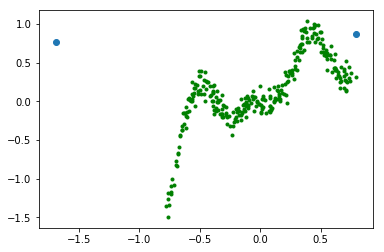

In [4]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
plt.scatter(piece.X, piece.Y)
piece.X, piece.Y

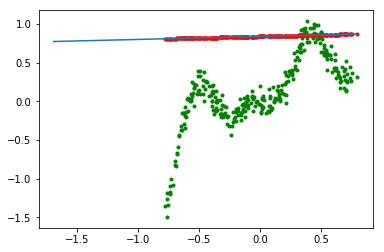

In [5]:
yout = piece.forward(xx)

plt.scatter(x, y, marker='.', color='g')
plt.plot(piece.X, piece.Y)
plt.scatter(x, yout.reshape(-1), marker='.', color='r')

In [6]:
dy = yout - yy
dy.shape

(300, 1)

In [7]:
dx = piece.backward(dy)
dx.shape

(300, 1)

In [8]:
piece.del_Y

array([[0.42212281],
       [0.27653712]])

In [9]:
piece.del_X

array([[0.01630497],
       [0.01068156]])

In [10]:
piece.update()

In [11]:
piece.X, piece.Y

(array([[ 0.79208343],
        [-1.69145992]]), array([[0.82526418],
        [0.74387137]]))

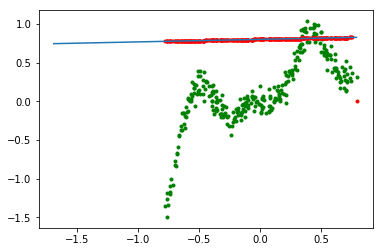

In [12]:
yout = piece.forward(xx)

plt.scatter(x, y, marker='.', color='g')
plt.plot(piece.X, piece.Y)
plt.scatter(x, yout.reshape(-1), marker='.', color='r')

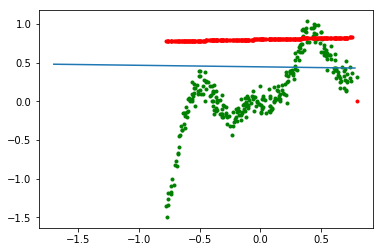

In [13]:
yout = piece.forward(xx)
dy = yout - yy
piece.backward(dy)
piece.update(1)

plt.scatter(x, y, marker='.', color='g')
plt.plot(piece.X, piece.Y)
plt.scatter(x, yout.reshape(-1), marker='.', color='r')

In [14]:
piece = tsn.SplineND(1)
piece.make_root_global_coverage(xx)

In [15]:
# ### checking for robustness
# piece.X = np.append(piece.X, np.array([[1]]), axis=0)
# piece.Y = np.append(piece.Y, np.array([[2]]), axis=0)
# piece.del_X = np.append(piece.del_X, np.array([[1]]), axis=0)
# piece.del_Y = np.append(piece.del_Y, np.array([[1]]), axis=0)

# piece.X

_______________________
Steps 0
Error 0.15961490056889838


_______________________
Steps 10
Error 0.13858818811996051


_______________________
Steps 20
Error 0.1259213822129683


_______________________
Steps 30
Error 0.11745013949571875


_______________________
Steps 40
Error 0.11160533086394837


_______________________
Steps 50
Error 0.10745735354182505


_______________________
Steps 60
Error 0.10443609094953703


_______________________
Steps 70
Error 0.102183838587346


_______________________
Steps 80
Error 0.10047024887798718


_______________________
Steps 90
Error 0.09914301175646267


_______________________
Steps 100
Error 0.09809884363077788


_______________________
Steps 110
Error 0.09726605091117008


_______________________
Steps 120
Error 0.09659379532432753


_______________________
Steps 130
Error 0.09604532324433607


_______________________
Steps 140
Error 0.09559359457095012


_______________________
Steps 150
Error 0.09521839817166196


______________________

TclError: invalid command name "pyimage13"

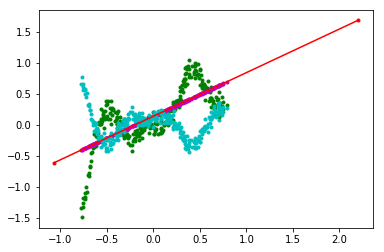

In [16]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()

for step in range(100000):

    Y = piece.forward(xx)
    
    dy = Y-yy
    dx = piece.backward(dy)
    piece.update(0.3)
        
    if step % 10 == 0:            
        error = (dy**2).mean()
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        
        ax.clear()
        plt.scatter(x, y, marker='.', color='g')
        plt.scatter(x, Y.reshape(-1), marker='.', color='m')
        plt.scatter(x, dx.reshape(-1), marker='.', color='c')
        
        plt.plot(piece.X, piece.Y, marker='.', color='r')
#         plt.scatter(x, dx, marker='.', color='c')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

In [ ]:
%matplotlib inline
plt.scatter(x, y, marker='.', color='g')
# plt.scatter(x, Y.reshape(-1), marker='.', color='m')
plt.plot(piece.X, piece.Y, marker='.', color='r')

In [ ]:
piece.make_root_global_coverage(xx) ## this caused the function to change 
plt.scatter(x, y, marker='.', color='g')
plt.plot(piece.X, piece.Y, marker='.', color='r')

### For 3D data

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

In [ ]:
num_points = 50
X1 = np.linspace(-2.5, 2.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
X1 = X1.reshape(-1)
X2 = X2.reshape(-1)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

In [ ]:
piece2D = tsn.SplineND(2)

XX = np.c_[X1, X2]
YY = Y.reshape(-1,1)
print(XX.shape)
piece2D.make_root_global_coverage(XX)
print(len(piece2D.root.get_points_inside(XX)))

In [ ]:
%matplotlib inline
plt.scatter(X1, X2)
plt.plot(piece2D.X[:,0], piece2D.X[:,1], lw=1, c='r')

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(piece2D.X[:,0], piece2D.X[:,1], piece2D.Y, lw=5, c='r')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [ ]:
piece2D.Y = np.array([1,-1,-3])

In [ ]:
YYout = piece2D.forward(XX)

%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, YYout.reshape(-1), color='r')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [ ]:
%matplotlib tk

piece2D = tsn.SplineND(2)
piece2D.make_root_global_coverage(XX)

fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = piece2D.forward(XX)
    dy = yout - YY
    dx = piece2D.backward(dy)
    
    piece2D.update(0.3)

    if epoch%10 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

In [ ]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [ ]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()